# EDA y ETL

------------------------------------------------------------------------------------------------------------------

# Internet Accesos por tecnologia

------------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Acceso_por_tecno = pd.read_csv('Datasets/Internet_Accesos-por-tecnologia.csv')

In [3]:
Acceso_por_tecno.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,4,1,6,3,573,222,11,Oct-Dic 2022
1,2022,3,1,6,3,557,235,11,Jul-Sept 2022
2,2022,2,1,6,3,556,232,11,Abr-Jun 2022
3,2022,1,2,6,2,546,252,11,Ene-Mar 2022
4,2021,4,2,6,2,523,253,10,Oct-Dic 2021


In [4]:
Acceso_por_tecno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           36 non-null     int64 
 1   Trimestre     36 non-null     int64 
 2   ADSL          36 non-null     int64 
 3   Cablemodem    36 non-null     int64 
 4   Fibra óptica  36 non-null     int64 
 5   Wireless      36 non-null     int64 
 6   Otros         36 non-null     int64 
 7   Total         36 non-null     int64 
 8   Periodo       36 non-null     object
dtypes: int64(8), object(1)
memory usage: 2.7+ KB


Eliminamos la columna 'Periodo' ya que proporciona la misma información que la columna 'Trimestre'. Asi no tenemos informacion duplicada procedemos a eliminarla

In [5]:
Acceso_por_tecno = Acceso_por_tecno.drop(columns= ['Periodo'])

# GRAFICOS

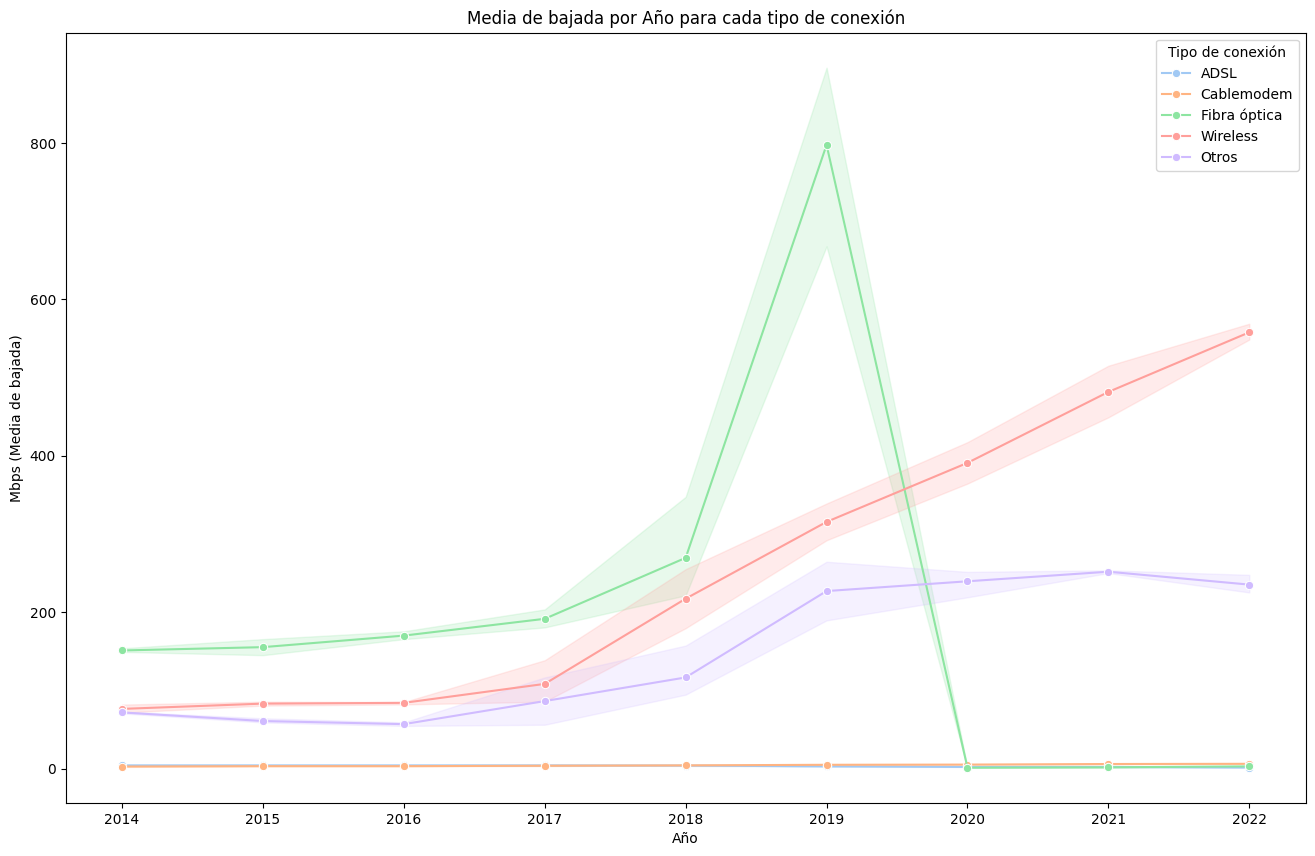

In [6]:
tipos = Acceso_por_tecno.columns[2:7]

plt.figure(figsize=(16, 10))
sns.set_palette("pastel")

# Creamos el gráfico de líneas por año y tipo de conexión
for tipo in tipos:
    sns.lineplot(data=Acceso_por_tecno, x='Año', y=tipo, marker='o', label=tipo)

# Agregamos título y etiquetas
plt.title('Media de bajada por Año para cada tipo de conexión')
plt.xlabel('Año')
plt.ylabel('Mbps (Media de bajada)')

# Añadimos una leyenda para identificar cada tipo de conexión
plt.legend(title='Tipo de conexión', bbox_to_anchor=(1, 1))

# Mostramos el gráfico
plt.show()

Segun lo que vemos en el grafico y en el dataframe llegamos a entender que hay algunos tipos que tienen muy pocos accesos como lo es (adsl o cablemodem) y que el mas alto en accesos es fibra optica pero con una rara baja en el año 2020 que lo dejaria en accesos casi nulos (seria imposible)

Nuestra conclusión luego de ya ver errores anteriormente en los datos y entendiendo que estos datos que estamos analizando tambien tienen errores es:

Los datos numericos que tenemos van de 70 a 900 aproximadamente. Y tenemos muchos otros datos que van de 1 a 6. A si mismo la fila de totales que agregaria lo de todas las filas va de 6 a 11. Por lo que seria inentendible tener datos por encima de esos. Si los valores que son menores a 11 lo pasamos a miles todos nuestros datos tendrian sentido y coincidiran con la columna 'total'

Daremos un ejemplo de una fila para que se entienda mejor.

Pirmero comenzamos con los datos que tenemos:

Año:2022	Trimestre:4	    ADSL:1	    Cablemodem:6	Fibra óptica:3	Wireless:573	Otros:222	Total:11

Ahora como quedarian los datos despues de agregarle los decimales como decimos:

Año:2022	Trimestre:4	    ADSL:1000	  Cablemodem:6000	Fibra óptica:3000	Wireless:573	Otros:222	Total:11000

Por la falta de decimales en un primer paso y con el incremento lineal de la fibra optica se da a entender que los valores del año 2020 agregandole los decimales que les falta continuaria la suma ascendente de este.

viendo ya lo que sucede con la fibra optica y siguiendo la misma logica llegamos a la conclusion que adsl y cablemodem son los accesos mas usados (ya que le agregamos los decimales que no tienen).

Tiene mucho sentido ya que el adsl utiliza la red telefonica para transmitir los datos, antes se usaba mucho ese medio por lo tanto era el que mas accesos tenia y luego al pasar los años se fue dejando de usara tanto asi que fue en un decrecimiento lineal al pasar los años.

por parte del cablemodem tambien tiene sentido que sea uno de los mas usados ya que utiliza el servicio de la tv y es un acceso muy comun por los argentinos, al pasar los años se suman muchos mas accesos

-------------------------------------------------------------------------------------------------------------

Ahora vamos a procedeer a normalizar los datos de las columnas que se encuentran mal respecto a lo que vimos y luego haremos el mismo grafico de antes pero con la data actualizada asi vemos los cambios

In [7]:
# Multiplicamos por 1000 las celdas en las columnas cuando sus valores sean menores a 12
columnas_a_multiplicar = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']

# Función para multiplicar por 1000 si el valor es menor a 12
def multiplicar_si_menor_a_12(valor):
    return valor * 1000 if valor < 12 else valor

# Aplicamos la función a todas las celdas en las columnas especificadas
Acceso_por_tecno[columnas_a_multiplicar] = Acceso_por_tecno[columnas_a_multiplicar].applymap(multiplicar_si_menor_a_12)

C:\Users\leand\AppData\Local\Temp\ipykernel_20664\4024874230.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  Acceso_por_tecno[columnas_a_multiplicar] = Acceso_por_tecno[columnas_a_multiplicar].applymap(multiplicar_si_menor_a_12)


In [8]:
Acceso_por_tecno.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,4,1000,6000,3000,573,222,11000
1,2022,3,1000,6000,3000,557,235,11000
2,2022,2,1000,6000,3000,556,232,11000
3,2022,1,2000,6000,2000,546,252,11000
4,2021,4,2000,6000,2000,523,253,10000


Ahora vamos a eliminar la columna de Total y la vamos a volver a generar con los datos actualizados

In [9]:
# Eliminar la columna Total 
Acceso_por_tecno = Acceso_por_tecno.drop(columns=['Total'])

# Crear la nueva columna Total_Nuevo
Acceso_por_tecno['Total'] = Acceso_por_tecno['ADSL'] + Acceso_por_tecno['Cablemodem'] + Acceso_por_tecno['Fibra óptica'] + Acceso_por_tecno['Wireless'] + Acceso_por_tecno['Otros']



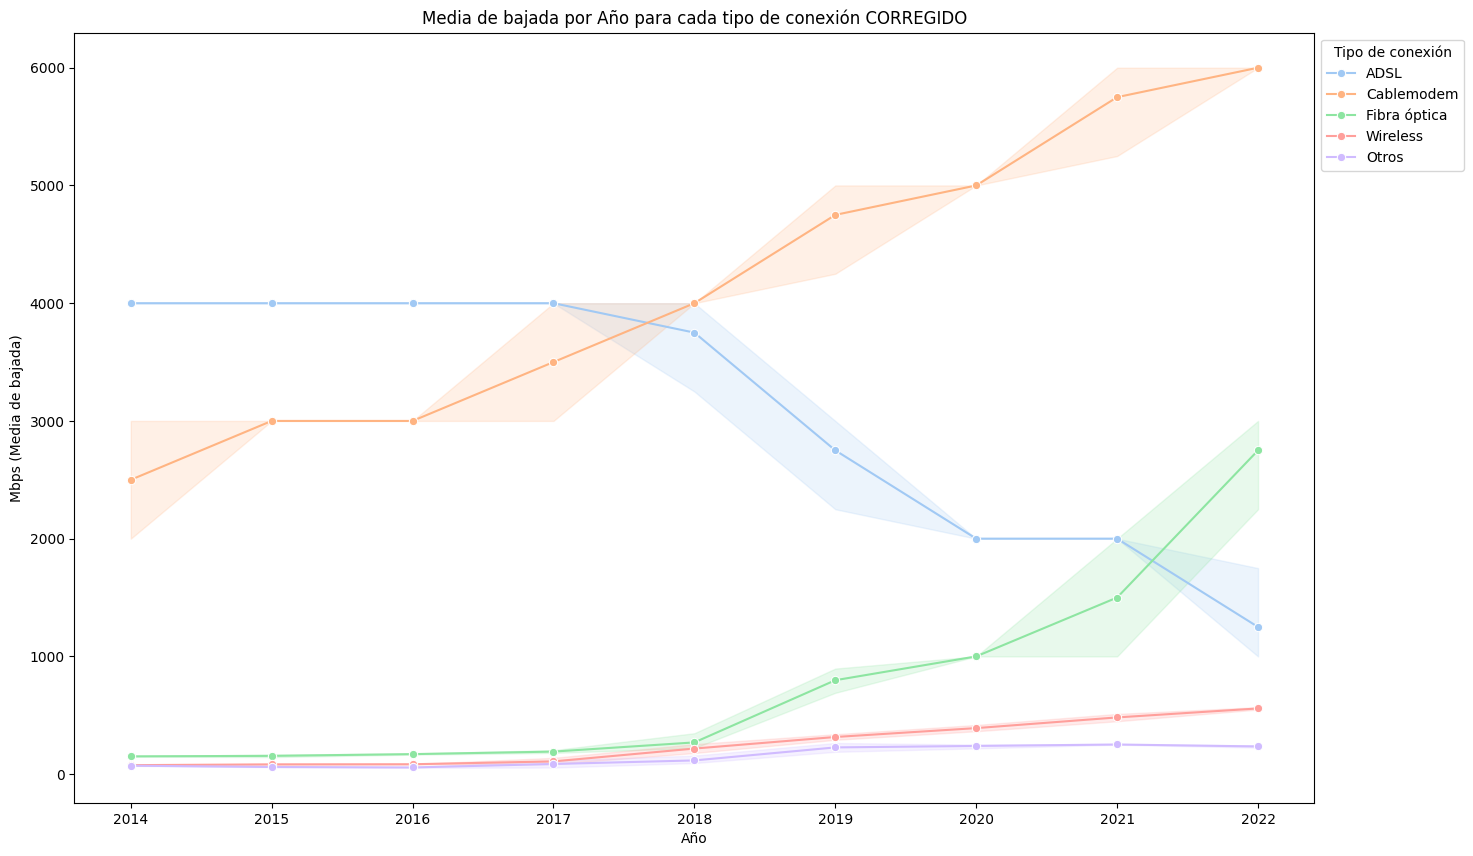

In [10]:
plt.figure(figsize=(16, 10))
sns.set_palette("pastel")

# Creamos el gráfico de líneas por año y tipo de conexión
for tipo in tipos:
    sns.lineplot(data=Acceso_por_tecno, x='Año', y=tipo, marker='o', label=tipo)

# Agregamos título y etiquetas
plt.title('Media de bajada por Año para cada tipo de conexión CORREGIDO')
plt.xlabel('Año')
plt.ylabel('Mbps (Media de bajada)')

# Añadimos una leyenda para identificar cada tipo de conexión
plt.legend(title='Tipo de conexión', bbox_to_anchor=(1, 1))

# Mostramos el gráfico
plt.show()

Podemos ver en este grafico que las conclusiones que sacamos anteriormente sobre el desarrollo de cada tipo de conexion fue la correcta!

------------------------------------------------------------------------------------------------------------------

# Listado de localidades con conectividad a internet

------------------------------------------------------------------------------------------------------------------

In [11]:
Listado_localidad = pd.read_csv('Datasets/Listadodelocalidadesconconectividadainternet ().csv')

In [12]:
Listado_localidad.head()

,Provincia,Partido,Localidad,ADSL,Cablemódem,Dial Up,Fibra óptica,4G,3G,Telefonía Fija,Wireless,Satelital
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),SI,--,--,--,SI,SI,SI,--,--
1,BUENOS AIRES,9 de Julio,Carlos María Naón,--,--,--,--,SI,SI,SI,--,--
2,BUENOS AIRES,9 de Julio,Dudignac,--,--,SI,--,SI,SI,SI,SI,--
3,BUENOS AIRES,9 de Julio,La Aurora (Est. La Niña),--,--,--,--,SI,--,--,--,--
4,BUENOS AIRES,9 de Julio,Manuel B. Gonnet (Est. French),SI,--,--,SI,SI,SI,SI,--,--


In [13]:
Listado_localidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4311 entries, 0 to 4310
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provincia       4311 non-null   object
 1   Partido         4311 non-null   object
 2   Localidad       4311 non-null   object
 3   ADSL            4311 non-null   object
 4   Cablemódem      4311 non-null   object
 5   Dial Up         4311 non-null   object
 6   Fibra óptica    4311 non-null   object
 7   4G              4311 non-null   object
 8   3G              4311 non-null   object
 9   Telefonía Fija  4311 non-null   object
 10  Wireless        4311 non-null   object
 11  Satelital       4311 non-null   object
dtypes: object(12)
memory usage: 404.3+ KB


Reemplazamos los datos que dicen '--' por un 'NO' asi tiene mas sentido y contrasta mas.
Luego hacemos un conteo de cada columna para ver la cantidad de datos que tiene acda valor

In [14]:
Listado_localidad = Listado_localidad.replace('--', 'NO')  # Reemplazamos '--' por 'No'

# Iteramos sobre cada columna y contar los valores
for columna in Listado_localidad.columns:
    conteo_valores = Listado_localidad[columna].value_counts()
    print(f"Conteo de valores en la columna '{columna}':\n{conteo_valores}\n")


Conteo de valores en la columna 'Provincia':
Provincia
BUENOS AIRES           901
CORDOBA                556
SANTA FE               388
SAN LUIS               229
MENDOZA                210
ENTRE RIOS             194
CATAMARCA              182
SANTIAGO DEL ESTERO    165
RIO NEGRO              162
JUJUY                  160
MISIONES               143
SALTA                  139
TUCUMAN                117
SAN JUAN               108
LA RIOJA                93
CHACO                   92
CHUBUT                  90
LA PAMPA                89
CORRIENTES              78
FORMOSA                 63
NEUQUEN                 61
CABA                    48
SANTA CRUZ              27
TIERRA DEL FUEGO        16
Name: count, dtype: int64

Conteo de valores en la columna 'Partido':
Partido
General Roca    84
Santa María     71
San Justo       62
Colón           62
La Capital      55
                ..
Huiliches        1
Ullum            1
Matacos          1
COMUNA 14        1
Rauch            1
Name: coun

In [15]:
numeric_columns = ['ADSL', 'Cablemódem', 'Dial Up', 'Fibra óptica', '4G', '3G', 'Telefonía Fija', 'Wireless', 'Satelital']

# Convertimos "SI" a 1 y "NO" a 0 en las columnas relevantes
Listado_localidad[numeric_columns] = Listado_localidad[numeric_columns].replace({'SI': 1, 'NO': 0})

# GRAFICOS

Hacemos un primer grafico para ver que cantidad de veces el tipo de conectividad se encuentra presente.
Podremos ver que las conectividades que son mas comunes son:'4G','Telefonía Fija','Wireless'  y la que no se encuentra mucho es la de 'Dial Up'

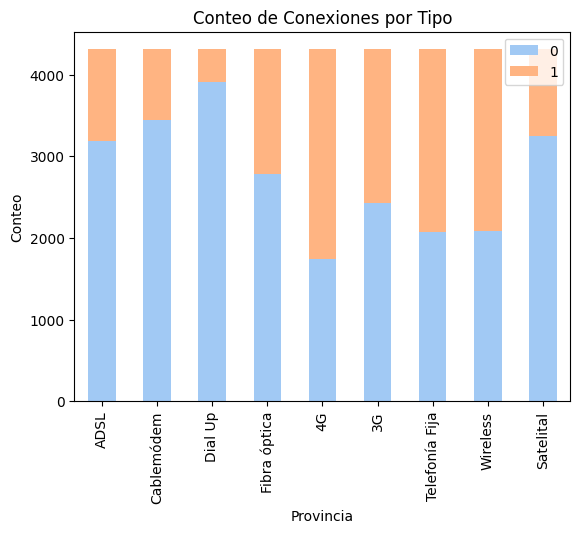

In [16]:
df_conexiones = Listado_localidad.iloc[:, 3:12]  # Seleccionamos solo las columnas de interés
conteo_por_tipo = df_conexiones.apply(lambda x: x.value_counts()).transpose()

conteo_por_tipo.plot(kind='bar', stacked=True)
sns.set_palette("inferno")
plt.title('Conteo de Conexiones por Tipo')
plt.xlabel('Provincia')
plt.ylabel('Conteo')
plt.show()

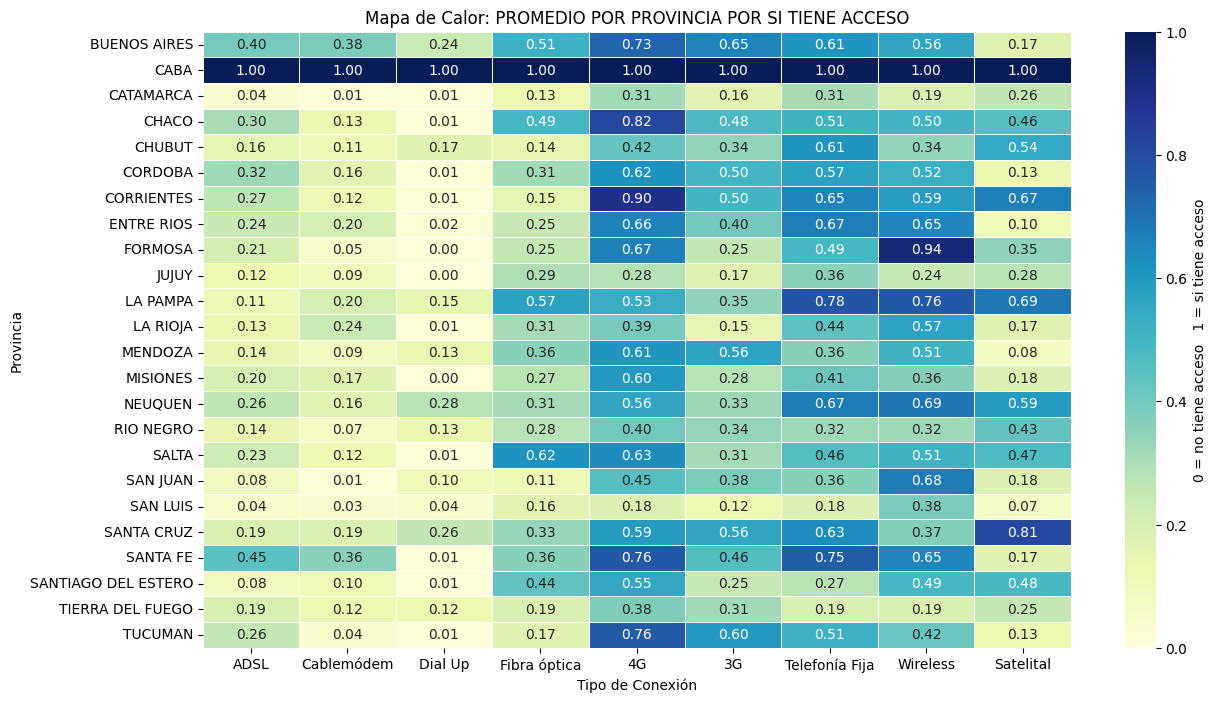

In [17]:
numeric_columns = ['ADSL', 'Cablemódem', 'Dial Up', 'Fibra óptica', '4G', '3G', 'Telefonía Fija', 'Wireless', 'Satelital']

# Convertimos "SI" a 1 y "NO" a 0 en las columnas relevantes
Listado_localidad[numeric_columns] = Listado_localidad[numeric_columns].replace({'SI': 1, 'NO': 0})

# Agrupamos por provincia y calculamos el promedio
heatmap_data = Listado_localidad.groupby('Provincia')[numeric_columns].mean().reset_index()

# Creamos el mapa de calor
plt.figure(figsize=(14, 8))
sns.heatmap(data=heatmap_data.set_index('Provincia'), cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5, cbar_kws={'label': '0 = no tiene acceso   1 = si tiene acceso'})

plt.title("Mapa de Calor: PROMEDIO POR PROVINCIA POR SI TIENE ACCESO")
plt.xlabel("Tipo de Conexión")
plt.ylabel("Provincia")

plt.show()


In [18]:
Mendoza = Listado_localidad[Listado_localidad['Provincia'] == 'MENDOZA']
Mendoza = Mendoza[Mendoza['Fibra óptica']== 1]
Mendoza.head()

,Provincia,Partido,Localidad,ADSL,Cablemódem,Dial Up,Fibra óptica,4G,3G,Telefonía Fija,Wireless,Satelital
107,MENDOZA,Lavalle,Villa Tulumaya,0,0,0,1,1,1,0,1,0
108,MENDOZA,Luján de Cuyo,Agrelo,1,0,0,1,1,1,1,1,0
110,MENDOZA,Luján de Cuyo,Barrio Perdriel IV,0,0,0,1,1,0,0,1,0
112,MENDOZA,Luján de Cuyo,CARRODILLA,0,0,0,1,1,1,0,1,0
113,MENDOZA,Luján de Cuyo,CHACRAS DE CORIA,0,0,0,1,1,1,0,1,0


------------------------------------------------------------------------------------------------------------------

# Accesos a Internet fijo por tecnologia y localidad

------------------------------------------------------------------------------------------------------------------

In [19]:
tecno_localidad = pd.read_csv('Datasets/AccesosaInternetfijoportecnologiaylocalidad (1).csv')

In [20]:
tecno_localidad.head()

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general,Unnamed: 13
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,874,"4,54",- 0,3,- 0,852,- 0,706,"6,98",NaN
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,- 0,- 0,- 0,10,1,- 0,- 0,192,NaN
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,- 0,- 0,- 0,- 0,- 0,- 0,- 0,181,181,NaN
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,- 0,782,- 0,6,167,- 0,- 0,327,"1,28",NaN
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,- 0,- 0,- 0,- 0,- 0,- 0,- 0,6,6,NaN


In [21]:
tecno_localidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3137 entries, 0 to 3136
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      3137 non-null   object 
 1   Partido        3137 non-null   object 
 2   Localidad      3137 non-null   object 
 3   Link Indec     3137 non-null   object 
 4   ADSL           3137 non-null   object 
 5   CABLEMODEM     3137 non-null   object 
 6   DIAL UP        3137 non-null   object 
 7   FIBRA OPTICA   3137 non-null   object 
 8   OTROS          3137 non-null   object 
 9   SATELITAL      3137 non-null   object 
 10  WIMAX          3137 non-null   object 
 11  WIRELESS       3137 non-null   object 
 12  Total general  3137 non-null   object 
 13  Unnamed: 13    0 non-null      float64
dtypes: float64(1), object(13)
memory usage: 343.2+ KB


Eliminamos la columna 'Unnamed: 13' ya que no tiene relevancia

In [22]:
tecno_localidad = tecno_localidad.drop(columns= ['Unnamed: 13'])

Normalizamos los datos '- 0' a un formato correcto como: '0'

In [23]:
tecno_localidad = tecno_localidad.replace('- 0', '0')

In [24]:
tecno_localidad.head()

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,874,"4,54",0,3,0,852,0,706,"6,98"
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,6,167,0,0,327,"1,28"
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6


Procedemos a cambiar las columnas a su tipo correcto, para poder realizarlo cambiamos las ',' por '.' asi podemos cambiar las columnas a tipo 'float' ya que las comas no lo toma como decimal.

In [25]:
# Seleccionamos las columnas que vamos a convertir
columnas_a_convertir = tecno_localidad.columns[4:]

# Iteramos sobre las columnas y las convertimos a tipo float
for columna in columnas_a_convertir:
    tecno_localidad[columna] = tecno_localidad[columna].replace(',', '.', regex=True).astype(float)


In [26]:
tecno_localidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3137 entries, 0 to 3136
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      3137 non-null   object 
 1   Partido        3137 non-null   object 
 2   Localidad      3137 non-null   object 
 3   Link Indec     3137 non-null   object 
 4   ADSL           3137 non-null   float64
 5   CABLEMODEM     3137 non-null   float64
 6   DIAL UP        3137 non-null   float64
 7   FIBRA OPTICA   3137 non-null   float64
 8   OTROS          3137 non-null   float64
 9   SATELITAL      3137 non-null   float64
 10  WIMAX          3137 non-null   float64
 11  WIRELESS       3137 non-null   float64
 12  Total general  3137 non-null   float64
dtypes: float64(9), object(4)
memory usage: 318.7+ KB


## GRAFICOS

Comenzamos con unos graficos paara ver el conteo y porcentaje de conexiones por tipo de conectividad y velocidad

C:\Users\leand\AppData\Local\Temp\ipykernel_20664\4188473230.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tecno_localidad[conectividad].sum(), errorbar=None, palette= 'pastel')


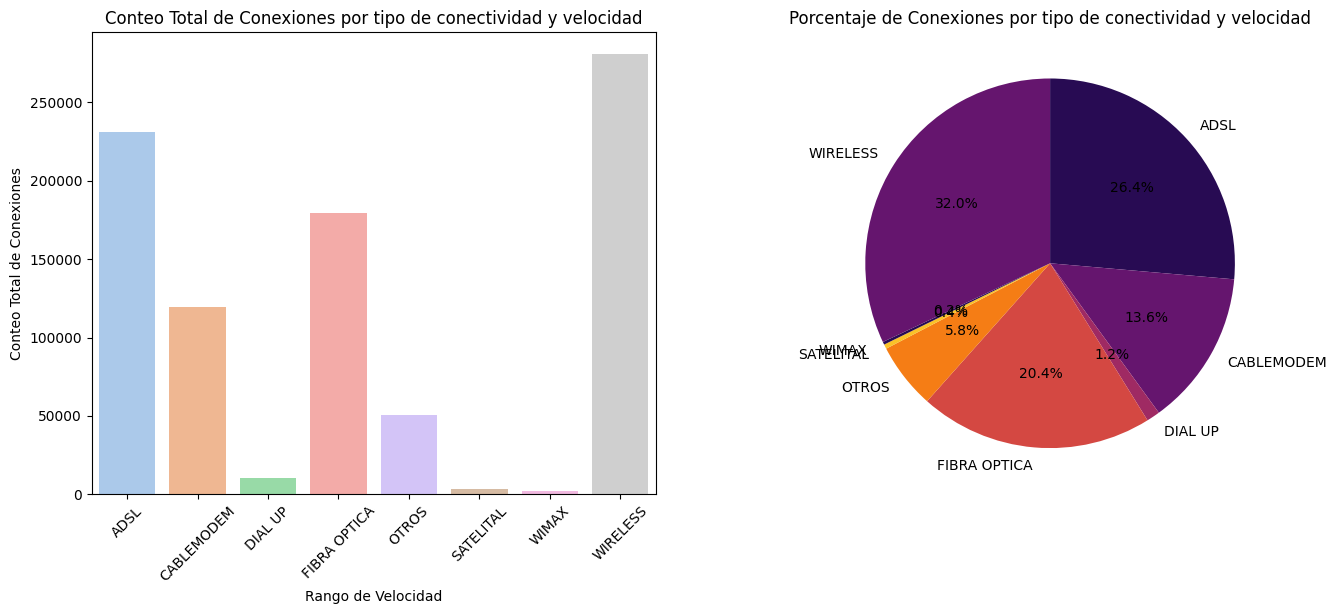

In [27]:
# Seleccionamos las columnas de rango de velocidad
conectividad = tecno_localidad.columns[4:12]

# Ajustamos el tamaño del gráfico
plt.figure(figsize=(16, 6))

# Creamos el gráfico de barras apiladas para los totales
plt.subplot(1, 2, 1)
sns.barplot(data=tecno_localidad[conectividad].sum(), errorbar=None, palette= 'pastel')
plt.title('Conteo Total de Conexiones por tipo de conectividad y velocidad')
plt.xlabel('Rango de Velocidad')
plt.ylabel('Conteo Total de Conexiones')
plt.xticks(rotation=45)

# Ajustamos el tamaño del gráfico de torta
plt.subplot(1, 2, 2)

# Utilizamos una paleta de colores distinguibles
sns.set_palette("pastel")

# Calculamos la suma total por tipo de conectividad y velocidad
total_por_conectividad = tecno_localidad[conectividad].sum()

# Creamos el gráfico de torta
plt.pie(total_por_conectividad, labels=total_por_conectividad.index, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Porcentaje de Conexiones por tipo de conectividad y velocidad')

# Mostramos ambos gráficos
plt.show()


#### Aqui podemos ver que las conectividades que predominan en total son:



WIRELESS: Al ser inalambrico en un pais como Argentina que es super grande es algo que se utiliza mucho para llegar a distintas partes del pais

ADSL: Es muy comun ya que es uno de los tipos de conectividad mas economicos.

FIBRA OPTICA: Al ser el tipo de conexion mas veloz en un pais con tanta cantidad de habitantes hay cierta gente con recursos suficientes para poder acceder a ella.





#### Las conectividades que menos se utilizan son:




DIAL UP: Al ofrecer velocidades bajas y ser un sistema antiguo ya no es muy comun.

SATELITAL: Es un tipo muy caro para las velocidades que ofrece por lo tanto tampoco se ve mucho en la Argentina.

WMAX: Por la baja densidad de población presenta unos costos por usuario muy elevados

In [28]:
tecno_localidad['Provincia'].unique()

array(['BUENOS AIRES', 'CABA', 'CATAMARCA', 'CHACO', 'CHUBUT', 'CORDOBA',
       'CORRIENTES', 'ENTRE RIOS', 'FORMOSA', 'JUJUY', 'LA PAMPA',
       'LA RIOJA', 'MENDOZA', 'MISIONES', 'NEUQUEN', 'RIO NEGRO', 'SALTA',
       'SAN JUAN', 'SAN LUIS', 'SANTA CRUZ', 'SANTA FE',
       'SANTIAGO DEL ESTERO', 'TIERRA DEL FUEGO', 'TUCUMAN'], dtype=object)

Ahora vamos a proceder a ver por algunas provincias en especial para saber cual tipo de conexion predomina. Vamos a poner provincias que tengan recuros distintos.

Tanto en la accesibilidad por la distancia como en la diferencia monetaria.

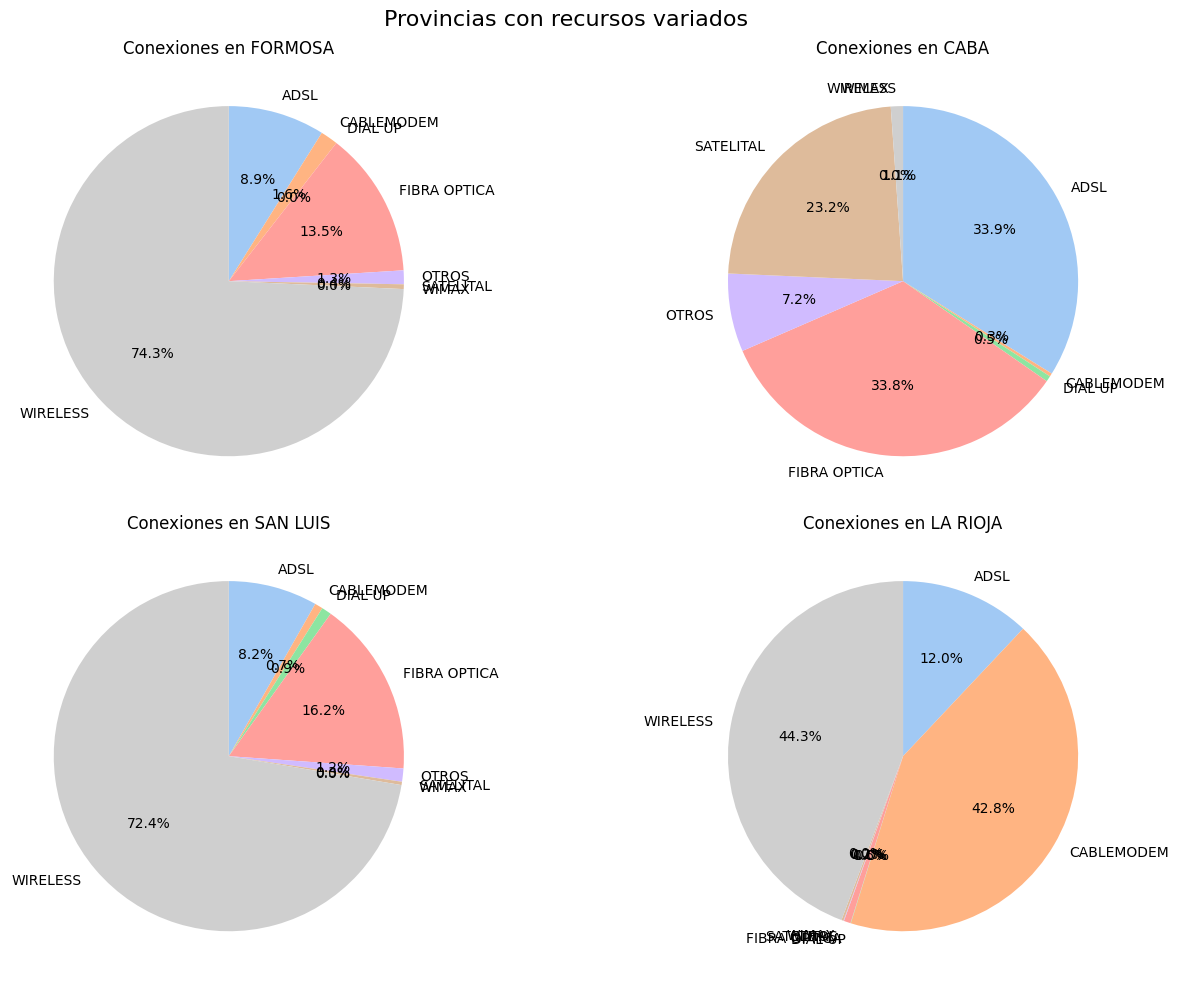

In [59]:
# Seleccionamos las provincias deseadas
provincias_seleccionadas = ['FORMOSA', 'CABA', 'SAN LUIS', 'LA RIOJA']

# Filtramos el DataFrame por las provincias seleccionadas
tecno_localidad_filtrado = tecno_localidad[tecno_localidad['Provincia'].isin(provincias_seleccionadas)]

# Seleccionamos las columnas de rango de velocidad
conectividad = tecno_localidad_filtrado.columns[4:12]

# Ajustamos el tamaño del gráfico de torta
plt.figure(figsize=(14, 10))

#Agregamos un titulo general
plt.suptitle('Provincias con recursos variados', fontsize=16)

# Creamos subgráficos
for i, provincia in enumerate(provincias_seleccionadas, 1):
    plt.subplot(2,2, i)
    
    # Filtramos por provincia
    df_provincia = tecno_localidad_filtrado[tecno_localidad_filtrado['Provincia'] == provincia]
    
    # Calculamos la suma total por tipo de conectividad y velocidad
    total_por_conectividad = df_provincia[conectividad].sum()
    
    # Creamos el gráfico de torta
    plt.pie(total_por_conectividad, labels=total_por_conectividad.index, autopct='%1.1f%%', startangle=90, counterclock=False)
    plt.title(f'Conexiones en {provincia}')

# Ajustamos el diseño y mostramos los gráficos
plt.tight_layout()
plt.show()

Podemos llegar a la conclusion de que en las provincias mas alejadas y precarias en recursos como puede ser la provincia de Formosa predomina la conectividad de Wireless. 
Esta es una conectividad inalambrica que se transmite por ondas de radio lo que permite llegar a lugares donde el cable no puede llegar. Por lo tanto es mucho mas economico este metodo pero el inconveniente que no tiene una tan alta velocidad como por cable pero es muy buena igual

Por otro lado en CABA al ser la ciudad mas poblada de la Argentina y contar con muchisimos recursos podemos observar que sus dos principales conectividades (entre las dos un 68%) son 'Fibra optica' y 'ADSL' los cuales son por cables. Por el lado de la fibra optica se entinede por su alta velocidad y el adsl tambien predomina en la ciudad por su bajo costo.

En San Luis  su gobierno proporciono wifi a toda la provincia gratuitamente. Más adelante entraremos en detalle.

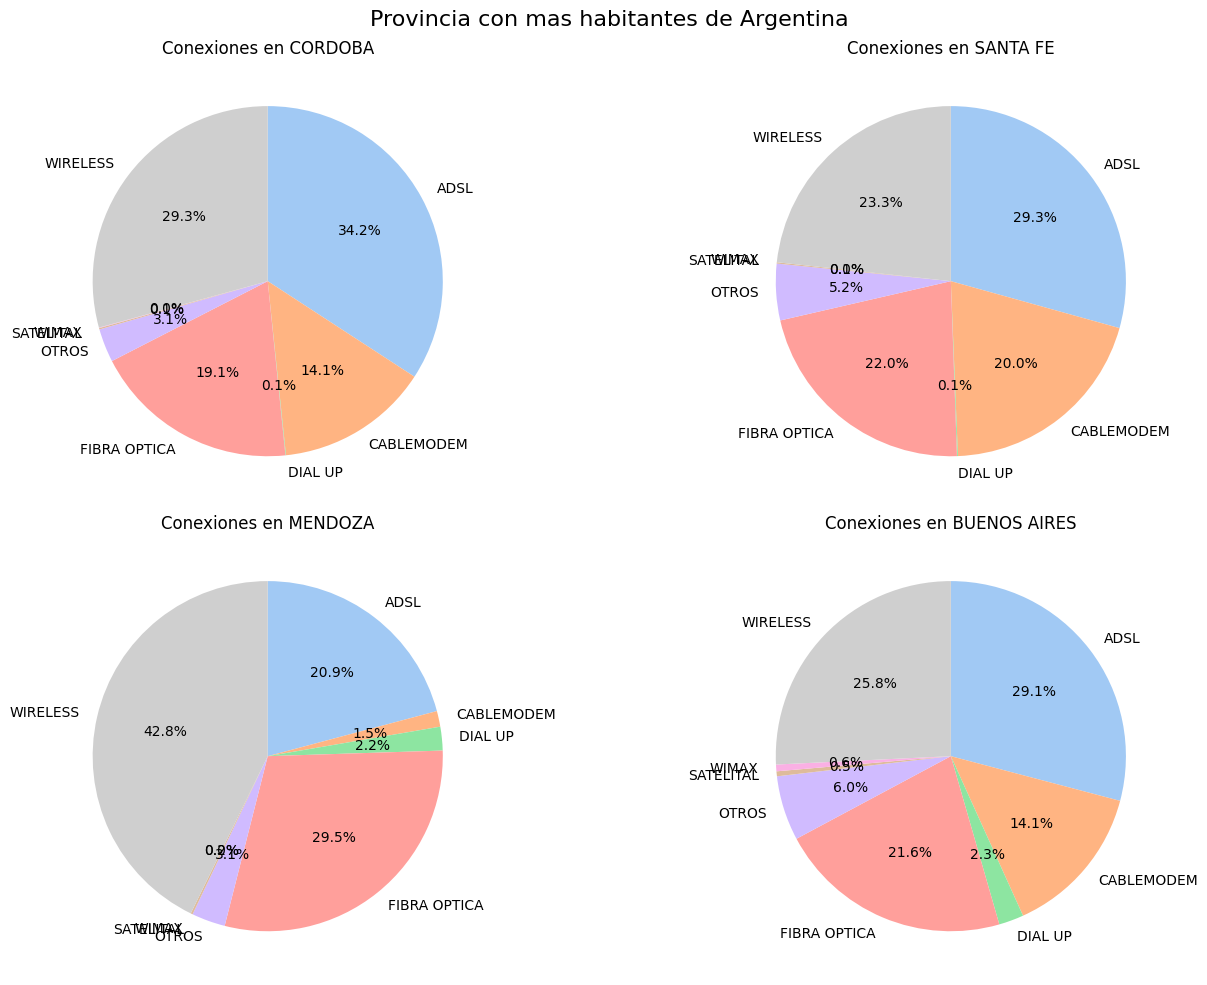

In [58]:
# Seleccionamos las provincias deseadas
provincias_seleccionadas = ['CORDOBA', 'SANTA FE', 'MENDOZA', 'BUENOS AIRES']

# Filtramos el DataFrame por las provincias seleccionadas
tecno_localidad_filtrado = tecno_localidad[tecno_localidad['Provincia'].isin(provincias_seleccionadas)]

# Seleccionamos las columnas de rango de velocidad
conectividad = tecno_localidad_filtrado.columns[4:12]

# Ajustamos el tamaño del gráfico de torta
plt.figure(figsize=(14, 10))

#Agregamos un titulo general
plt.suptitle('Provincia con mas habitantes de Argentina', fontsize=16)

# Creamos subgráficos
for i, provincia in enumerate(provincias_seleccionadas, 1):
    plt.subplot(2,2, i)
    
    # Filtramos por provincia
    df_provincia = tecno_localidad_filtrado[tecno_localidad_filtrado['Provincia'] == provincia]
    
    # Calculamos la suma total por tipo de conectividad y velocidad
    total_por_conectividad = df_provincia[conectividad].sum()
    
    # Creamos el gráfico de torta
    plt.pie(total_por_conectividad, labels=total_por_conectividad.index, autopct='%1.1f%%', startangle=90, counterclock=False)
    plt.title(f'Conexiones en {provincia}')

# Ajustamos el diseño y mostramos los gráficos
plt.tight_layout()
plt.show()

C:\Users\leand\AppData\Local\Temp\ipykernel_20664\4148373711.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=conteo_fibra_optica_por_partido.reset_index(), x='Partido', y= 1, palette='pastel')


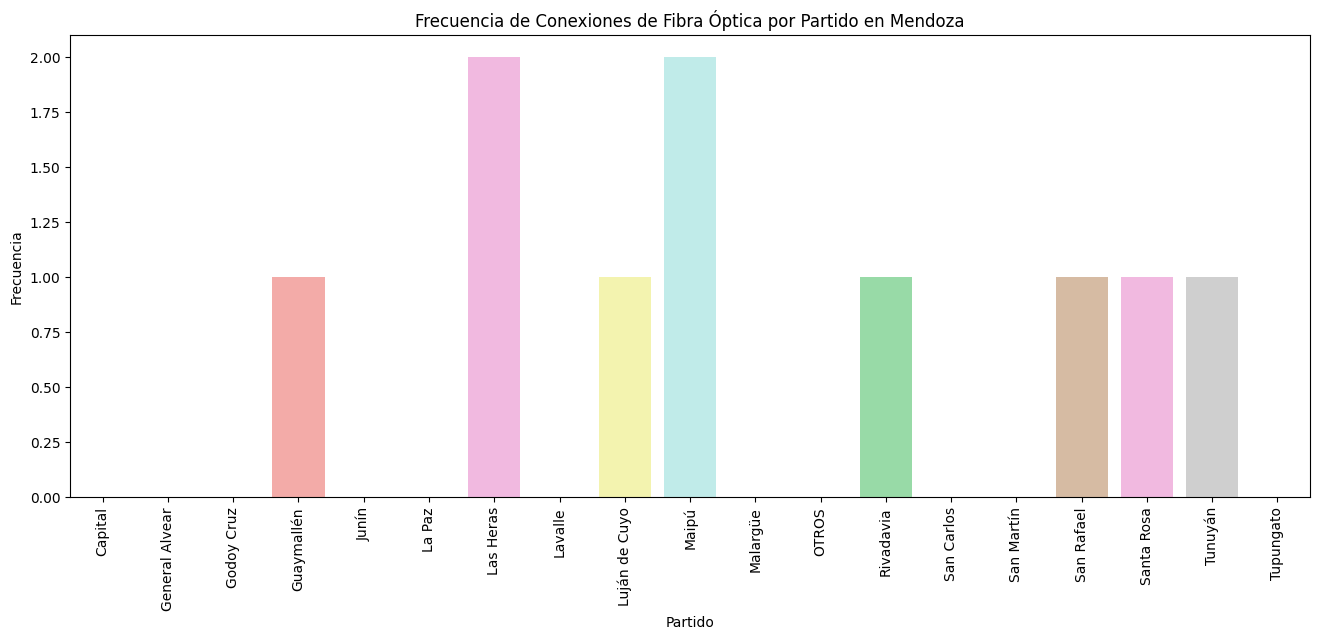

In [31]:
# Filtramos los datos de Mendoza
Mendoza = tecno_localidad[tecno_localidad['Provincia'] == 'MENDOZA']

# Contamos la frecuencia de conexiones de fibra óptica agrupado por partido
conteo_fibra_optica_por_partido = Mendoza.groupby('Partido')['FIBRA OPTICA'].value_counts().unstack().fillna(0)

# Ajustamos el tamaño del gráfico
plt.figure(figsize=(16, 6))

# Utilizamos Seaborn para el gráfico de barras apiladas
sns.barplot(data=conteo_fibra_optica_por_partido.reset_index(), x='Partido', y= 1, palette='pastel')

plt.title('Frecuencia de Conexiones de Fibra Óptica por Partido en Mendoza')
plt.xlabel('Partido')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)

# Mostramos el gráfico
plt.show()





En este grafico podemos ver los accesos de Conexiones de Fibra Óptica por Partido en Mendoza

------------------------------------------------------------------------------------------------------------------

#  Internet Penetracion

### Data resumida

------------------------------------------------------------------------------------------------------------------

In [32]:
Internet_Penetracion_1 = pd.read_csv('Datasets/Internet_Penetracion (1).csv')

In [33]:
Internet_Penetracion_1.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,4,"77,21","24,15",Oct-Dic 2022
1,2022,3,"76,64","23,95",Jul-Sept 2022
2,2022,2,"75,97","23,72",Abr-Jun 2022
3,2022,1,"73,88","23,05",Ene-Mar 2022
4,2021,4,"73,18","22,81",Oct-Dic 2021


In [34]:
Internet_Penetracion_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           36 non-null     int64 
 1   Trimestre                     36 non-null     int64 
 2   Accesos por cada 100 hogares  36 non-null     object
 3   Accesos por cada 100 hab      36 non-null     object
 4   Periodo                       36 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.5+ KB


In [35]:
Internet_Penetracion_1 = Internet_Penetracion_1.drop('Periodo', axis=1)

Cambiamos los datos que estan como ',' por '.' para que cuando lo convirtamos en tipo float lo tome como decimal y no nos devuelva un error.

In [36]:
Internet_Penetracion_1['Accesos por cada 100 hab'] = Internet_Penetracion_1['Accesos por cada 100 hab'].str.replace(',', '.', regex=True)
Internet_Penetracion_1['Accesos por cada 100 hogares'] = Internet_Penetracion_1['Accesos por cada 100 hogares'].str.replace(',', '.', regex=True)
Internet_Penetracion_1['Accesos por cada 100 hab'] = Internet_Penetracion_1['Accesos por cada 100 hab'].astype(float)
Internet_Penetracion_1['Accesos por cada 100 hogares'] = Internet_Penetracion_1['Accesos por cada 100 hogares'].astype(float)

In [37]:
Internet_Penetracion_1 = Internet_Penetracion_1.drop_duplicates()

In [38]:
Internet_Penetracion_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           36 non-null     int64  
 1   Trimestre                     36 non-null     int64  
 2   Accesos por cada 100 hogares  36 non-null     float64
 3   Accesos por cada 100 hab      36 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.3 KB


# GRAFICOS

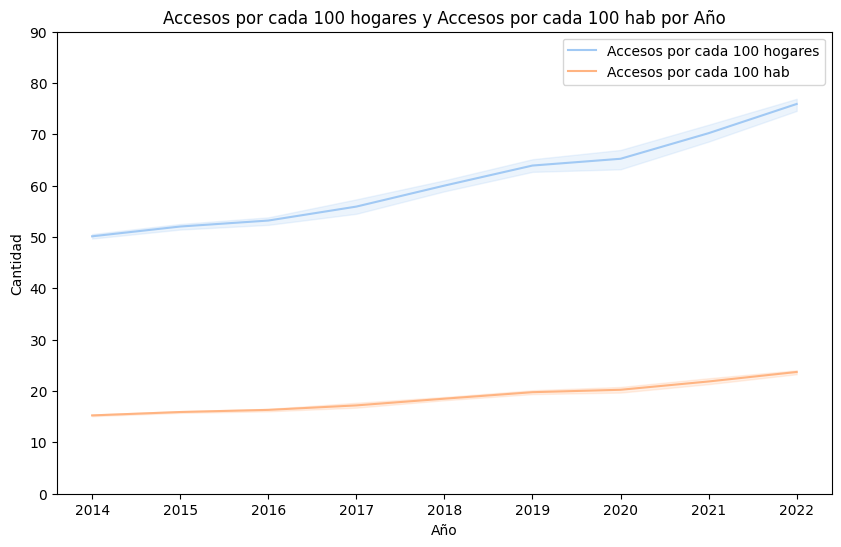

In [39]:
# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))

# Línea para 'Accesos por cada 100 hogares'
sns.lineplot(x='Año', y='Accesos por cada 100 hogares', data=Internet_Penetracion_1, label='Accesos por cada 100 hogares')

# Línea para 'Accesos por cada 100 hab'
sns.lineplot(x='Año', y='Accesos por cada 100 hab', data=Internet_Penetracion_1, label='Accesos por cada 100 hab')

# Configuración del gráfico
plt.title('Accesos por cada 100 hogares y Accesos por cada 100 hab por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad')
# Ajustar los intervalos en el eje y
plt.yticks(range(0, 100, 10))
plt.legend()  # Mostrar leyenda

# Mostrar el gráfico
plt.show()

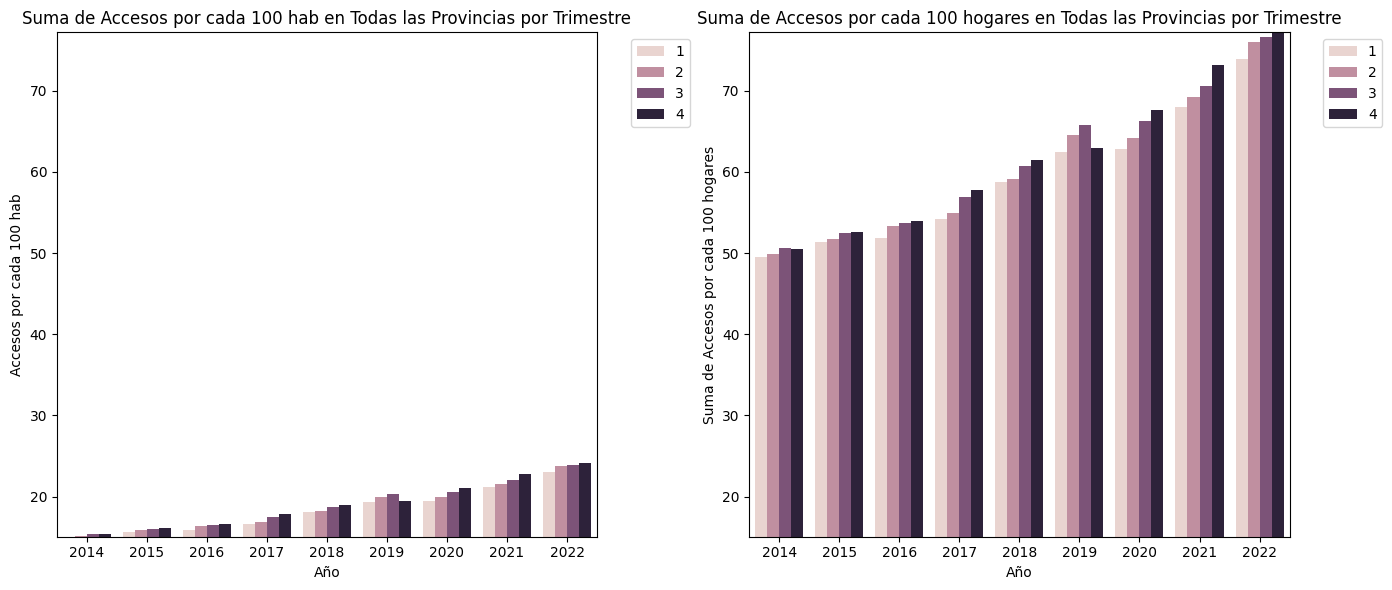

In [40]:
# Crear un gráfico de barras para la suma de todas las provincias
plt.figure(figsize=(14, 6))
# Obtener los límites del eje y para asegurar la misma escala en todos los gráficos
y_min = min(
    Internet_Penetracion_1['Accesos por cada 100 hogares'].min(),
    Internet_Penetracion_1['Accesos por cada 100 hab'].min()
)
y_max = max(
    Internet_Penetracion_1['Accesos por cada 100 hogares'].max(),
    Internet_Penetracion_1['Accesos por cada 100 hab'].max()
)

total_accesos = Internet_Penetracion_1.groupby(['Año', 'Trimestre'])['Accesos por cada 100 hab'].sum().reset_index()
plt.subplot(1, 2, 1)
sns.barplot(data=total_accesos, x='Año', y='Accesos por cada 100 hab', hue='Trimestre')
plt.title("Suma de Accesos por cada 100 hab en Todas las Provincias por Trimestre")
plt.xlabel("Año")
plt.ylabel("Accesos por cada 100 hab")
plt.ylim(y_min,y_max)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

total_accesos = Internet_Penetracion_1.groupby(['Año', 'Trimestre'])['Accesos por cada 100 hogares'].sum().reset_index()
plt.subplot(1, 2, 2)
sns.barplot(data=total_accesos, x='Año', y='Accesos por cada 100 hogares', hue='Trimestre')
plt.title("Suma de Accesos por cada 100 hogares en Todas las Provincias por Trimestre")
plt.xlabel("Año")
plt.ylabel("Suma de Accesos por cada 100 hogares")
plt.ylim(y_min,y_max)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

En ambos graficos podemos notar que al pasar de los años hay un incremento lineal y nada que se aleje mucho de la normalidad

------------------------------------------------------------------------------------------------------------------

# Internet Penetracion (completo)

------------------------------------------------------------------------------------------------------------------

Cargamos en la variable Internet_Penetracion un DataFrame con los datos del csv 'Internet_Penetracion.csv' asi ya los podemos empezar a visualizar y transformar

In [41]:
Internet_Penetracion = pd.read_csv('Datasets/Internet_Penetracion.csv')

Comenzamos haciendo una vista previa de los datos para saber si se cargaron bien y ver que es lo que contienen

In [42]:
Internet_Penetracion.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,2022,4,Buenos Aires,"78,94",NaN,NaN,NaN
1,2022,4,Capital Federal,"122,73",NaN,NaN,NaN
2,2022,4,Catamarca,"65,77",NaN,NaN,NaN
3,2022,4,Chaco,"43,62",NaN,NaN,NaN
4,2022,4,Chubut,"85,57",NaN,NaN,NaN


Analizamos los tipos de datos que tenemos en el df que creamos y si tenemos nulos

In [43]:
Internet_Penetracion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           864 non-null    int64  
 1   Trimestre                     864 non-null    int64  
 2   Provincia                     864 non-null    object 
 3   Accesos por cada 100 hogares  864 non-null    object 
 4   Unnamed: 4                    0 non-null      float64
 5   Unnamed: 5                    0 non-null      float64
 6   Unnamed: 6                    0 non-null      float64
dtypes: float64(3), int64(2), object(2)
memory usage: 47.4+ KB


proporcionamos información descriptiva sobre los datos

In [44]:
Internet_Penetracion.describe()

,Año,Trimestre,Unnamed: 4,Unnamed: 5,Unnamed: 6
count,864.000000,864.000000,0.0,0.0,0.0
mean,2018.000000,2.500000,NaN,NaN,NaN
std,2.583484,1.118682,NaN,NaN,NaN
min,2014.000000,1.000000,NaN,NaN,NaN
25%,2016.000000,1.750000,NaN,NaN,NaN
50%,2018.000000,2.500000,NaN,NaN,NaN
75%,2020.000000,3.250000,NaN,NaN,NaN
max,2022.000000,4.000000,NaN,NaN,NaN


Logramos ver que las columnas ('Unnamed: 4','Unnamed: 5','Unnamed: 6') se encuentran vacias asi que procedemos a eliminarlas

In [45]:
Internet_Penetracion = Internet_Penetracion.drop(columns= ['Unnamed: 4','Unnamed: 5','Unnamed: 6'])

Vemos tambien que la columna 'Accesos por cada 100 hogares' esta en un tipo incorrecto asi que vamos a proceder a corregirlo y ponerlo en tipo float como deberia ser

In [46]:
# Reemplazamos las comas por puntos en la columna ya que sino no nos deja cambiarlo a tipo float
Internet_Penetracion['Accesos por cada 100 hogares'] = Internet_Penetracion['Accesos por cada 100 hogares'].str.replace(',', '.', regex=True)
Internet_Penetracion['Accesos por cada 100 hogares'] = Internet_Penetracion['Accesos por cada 100 hogares'].astype(float)

Vemos los valores unicos que tenemos en la columna 'Provincia'. Y logramos ver que estan las 23 provincias de la Argentina mas 'Capital Federal'

In [47]:
Internet_Penetracion['Provincia'].unique()

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

Aqui vemos tambien los valores unicos pero para la columna 'Año'

In [48]:
Internet_Penetracion['Año'].unique()

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014], dtype=int64)

# Hacemos algunos graficos 

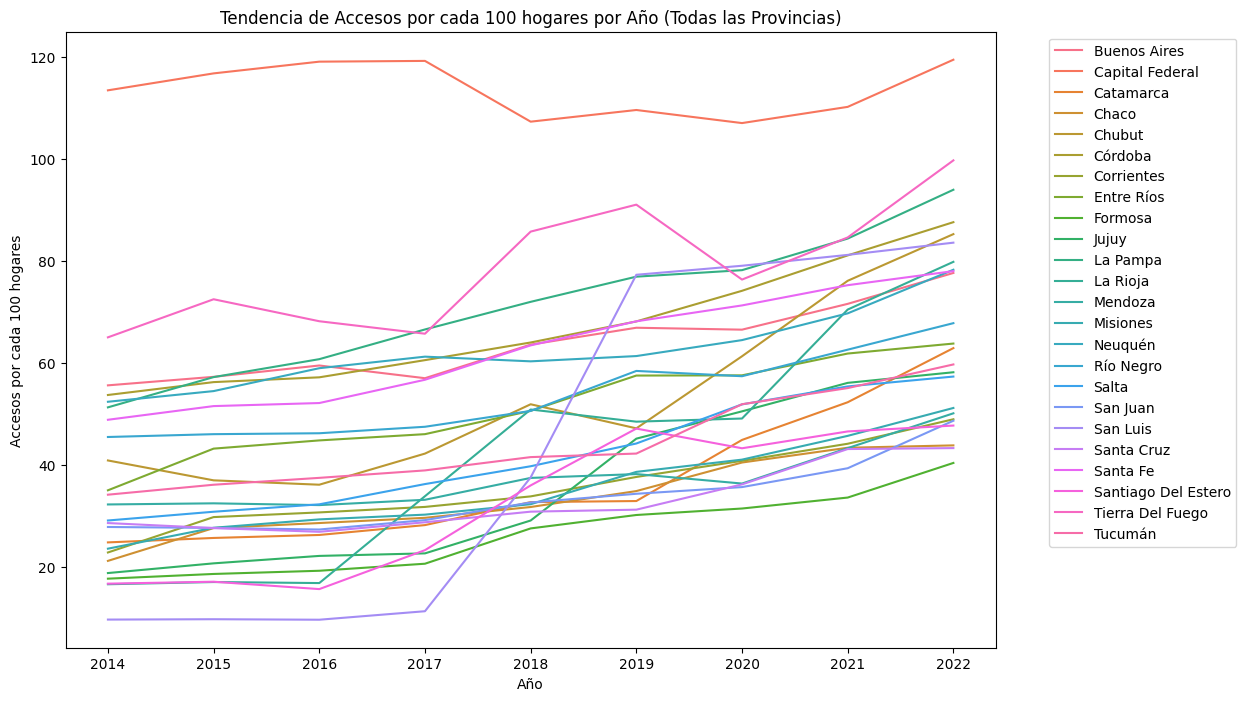

In [49]:
# Supongamos que tienes un DataFrame llamado df con las columnas 'Año', 'Provincia' y 'Accesos por cada 100 hogares'.

plt.figure(figsize=(12, 8))

# Crea un gráfico de líneas para todas las provincias
sns.lineplot(data=Internet_Penetracion, x='Año', y='Accesos por cada 100 hogares', hue='Provincia', err_style=None)

plt.title("Tendencia de Accesos por cada 100 hogares por Año (Todas las Provincias)")
plt.xlabel("Año")
plt.ylabel("Accesos por cada 100 hogares")

# Ajusta la leyenda para que no se superponga
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

##### En este segundo grafico de cajas podremos observar la distribución de Accesos por cada 100 hogares por Año. se podra notar que contamos con algunos outliers, vamos a proceder a ver mas de cerca estos outliers para ver que decisión tomamos sobre ellos.

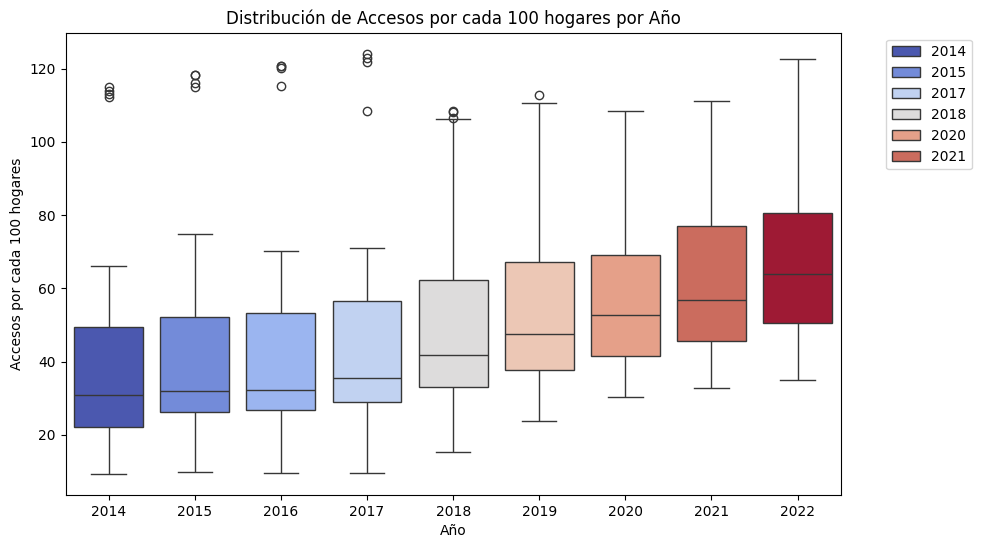

In [50]:
plt.figure(figsize=(10, 6))

# Crea un gráfico de cajas
sns.boxplot(data=Internet_Penetracion, x='Año', y='Accesos por cada 100 hogares',hue= 'Año', palette='coolwarm')

plt.title("Distribución de Accesos por cada 100 hogares por Año")
plt.xlabel("Año")
plt.ylabel("Accesos por cada 100 hogares")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Proximamente visualizaremos en df_filtrado estos outliers que veiamos en el grafico de cajas, viendo asi que todos estos son de la Capital Federal y solo uno de otra provincia que seria Tierra del fuego.
Con ayuda de los graficos que continuan abajo definiremos la decision final sobre que hacer con estos

In [51]:
df_mas100 = Internet_Penetracion[Internet_Penetracion['Accesos por cada 100 hogares'] > 100]
df_mas100

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
1,2022,4,Capital Federal,122.73
22,2022,4,Tierra Del Fuego,101.44
25,2022,3,Capital Federal,122.28
49,2022,2,Capital Federal,121.31
73,2022,1,Capital Federal,111.80
97,2021,4,Capital Federal,111.27
121,2021,3,Capital Federal,111.27
145,2021,2,Capital Federal,110.14
169,2021,1,Capital Federal,108.42
193,2020,4,Capital Federal,108.31


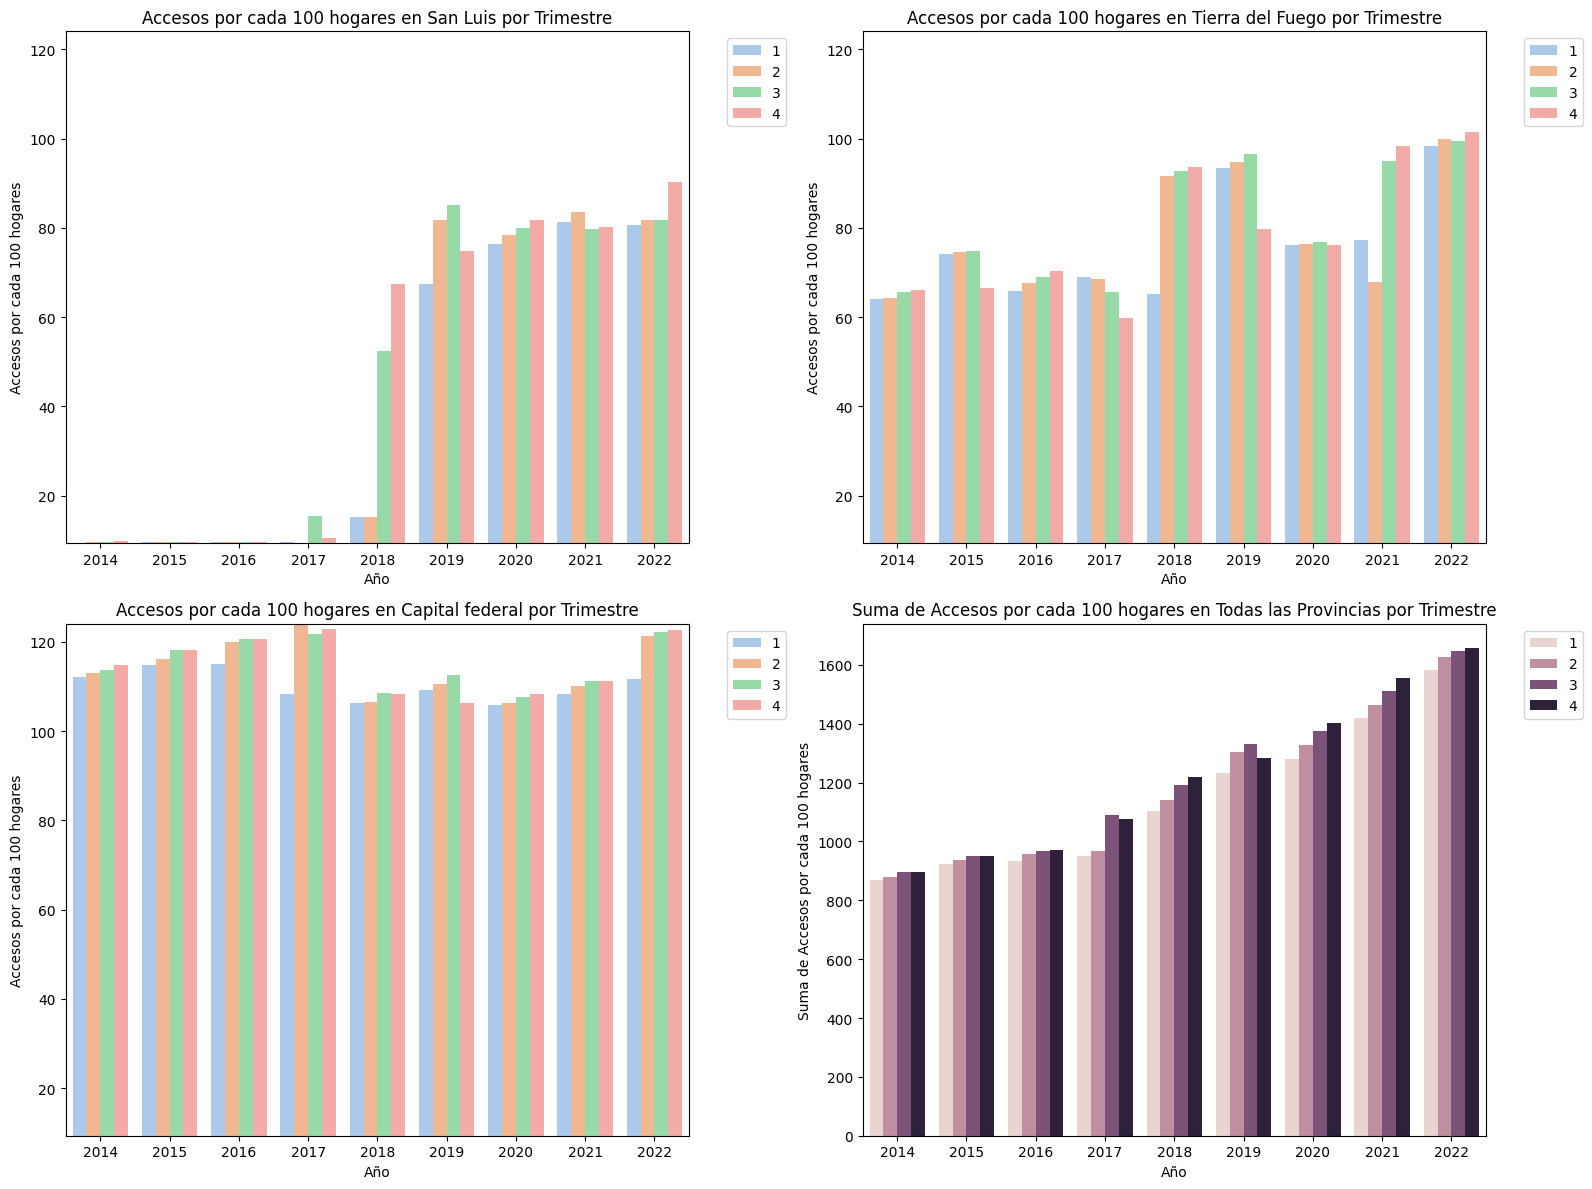

In [52]:
# Filtrar los datos para la provincia de San Luis
provincia_san_luis = Internet_Penetracion[Internet_Penetracion['Provincia'] == 'San Luis']

# Filtrar los datos para la provincia de Tierra del Fuego
provincia_tierra_del_fuego = Internet_Penetracion[Internet_Penetracion['Provincia'] == 'Tierra Del Fuego']

# Filtrar los datos para la provincia de Buenos Aires
provincia_Capital_Federal = Internet_Penetracion[Internet_Penetracion['Provincia'] == 'Capital Federal']

# Obtener los límites del eje y para asegurar la misma escala en todos los gráficos
y_min = min(
    provincia_tierra_del_fuego['Accesos por cada 100 hogares'].min(),
    provincia_san_luis['Accesos por cada 100 hogares'].min(),
    provincia_Capital_Federal['Accesos por cada 100 hogares'].min()
)
y_max = max(
    provincia_tierra_del_fuego['Accesos por cada 100 hogares'].max(),
    provincia_san_luis['Accesos por cada 100 hogares'].max(),
    provincia_Capital_Federal['Accesos por cada 100 hogares'].max()
)

# Crear un gráfico de barras para San Luis
plt.figure(figsize=(16, 12))  # Ajusta el tamaño de la figura para 4 subgráficos

# Gráfico para San Luis
plt.subplot(2, 2, 1)  # 2 filas, 2 columnas, primer subgráfico
sns.barplot(data=provincia_san_luis, x='Año', y='Accesos por cada 100 hogares', hue='Trimestre', palette= 'pastel')
plt.title("Accesos por cada 100 hogares en San Luis por Trimestre")
plt.xlabel("Año")
plt.ylabel("Accesos por cada 100 hogares")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(y_min,y_max)

# Gráfico para Tierra del Fuego
plt.subplot(2, 2, 2)  # 2 filas, 2 columnas, segundo subgráfico
sns.barplot(data=provincia_tierra_del_fuego, x='Año', y='Accesos por cada 100 hogares', hue='Trimestre', palette= 'pastel')
plt.title("Accesos por cada 100 hogares en Tierra del Fuego por Trimestre")
plt.xlabel("Año")
plt.ylabel("Accesos por cada 100 hogares")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(y_min,y_max)

# Gráfico para Buenos Aires
plt.subplot(2, 2, 3)  # 2 filas, 2 columnas, tercer subgráfico
sns.barplot(data=provincia_Capital_Federal, x='Año', y='Accesos por cada 100 hogares', hue='Trimestre', palette= 'pastel')
plt.title("Accesos por cada 100 hogares en Capital federal por Trimestre")
plt.xlabel("Año")
plt.ylabel("Accesos por cada 100 hogares")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(y_min,y_max)

# Crear un gráfico de barras para la suma de todas las provincias
total_accesos = Internet_Penetracion.groupby(['Año', 'Trimestre'])['Accesos por cada 100 hogares'].sum().reset_index()
plt.subplot(2, 2, 4)  # 2 filas, 2 columnas, cuarto subgráfico
sns.barplot(data=total_accesos, x='Año', y='Accesos por cada 100 hogares', hue='Trimestre')
plt.title("Suma de Accesos por cada 100 hogares en Todas las Provincias por Trimestre")
plt.xlabel("Año")
plt.ylabel("Suma de Accesos por cada 100 hogares")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


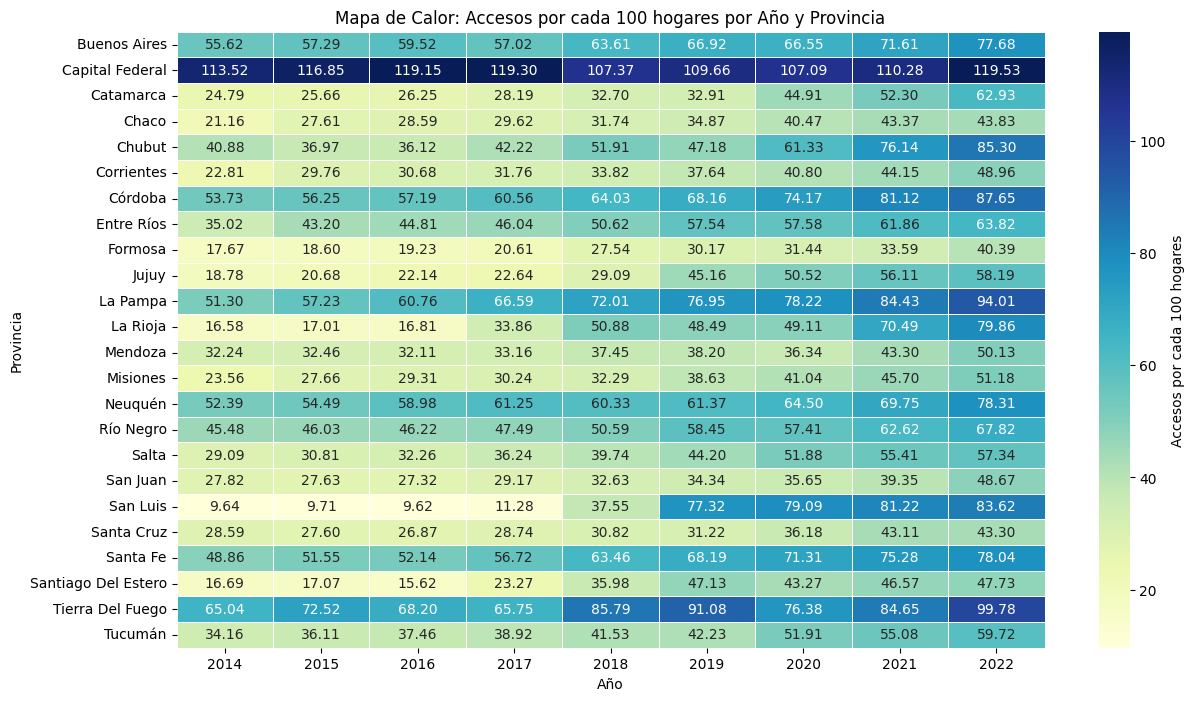

In [53]:
heatmap_data = Internet_Penetracion.pivot_table(index='Provincia', columns='Año', values='Accesos por cada 100 hogares', aggfunc='mean')

plt.figure(figsize=(14, 8))

# Crear el heatmap
sns.heatmap(data=heatmap_data, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Accesos por cada 100 hogares'})

plt.title("Mapa de Calor: Accesos por cada 100 hogares por Año y Provincia")
plt.xlabel("Año")
plt.ylabel("Provincia")

plt.show()

 Finalmente vemos que no vamos a considerar eliminar esos outliers ya que no creemos que sean errores.

 Por un lado en la provincia de Tierra del Fuego se puede observar una incrementacion a traves de los años que lo podrian hacer llegar a ese valor de 'accesos por cada 100 hogares', por lo cual lo dejaremos.
 
 Por otra parte en la Capital Federal estuvieron siempre con un acceso muy alto, esto se debe a que alli vive mucha cantidad de habitantes en una superfice que no es tan amplia como el de las otras provincias y eso le permite acceder mas facilmente a internet


In [54]:
df_menos15 = Internet_Penetracion[Internet_Penetracion['Accesos por cada 100 hogares'] < 15]
df_menos15

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
498,2017,4,San Luis,10.59
546,2017,2,San Luis,9.51
549,2017,2,Santiago Del Estero,14.12
570,2017,1,San Luis,9.55
573,2017,1,Santiago Del Estero,14.70
594,2016,4,San Luis,9.64
618,2016,3,San Luis,9.63
642,2016,2,San Luis,9.60
666,2016,1,San Luis,9.59
690,2015,4,San Luis,9.71


Por otra parte vemos los outliers contrarios, si, los datos mas bajos que tenemos. La mayoria son de la provincia de San Luis y hay algunos de la provincia de Santiago del Estero.

Del lado de Santiago del Estero lo vemos normal, ya que es una provincia que no cuenta con muchos recuros asi que hace unos años no podian contar con tantos accesos a internet, obviamente al pasar los años estos accesos fueron incrementando gradualmente y dejaron de ser conciderados 'outliers' aunque continuen siendo una provincia con pocos accesos comparandola con otras provincias

Del lado de San Luis no se destaca por ser una provincia con mucho apoyo, pero en los ultimos años crecio considerablemente y mas en el sector de las telecomunicaciones ya que se la conoce a la provincia por tener 'wifi gratis' en cada ciudad de la provincia (por lo tanto si vemos los tipos de conectividad mas usados en la provincia aparecera el Wireless como principal tipo de conexion), por eso el incremento abrupto de tener pocos accesos a ser una de las provincias con mas accesos a internet.

------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------

# ---------CREAMOS CSV CON LA DATA LIMPIA----------

------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------

In [55]:
'''
Acceso_por_tecno.to_csv('Acceso_por_tecno.csv', index=True)
Listado_localidad.to_csv('Listado_localidad.csv', index=True)
tecno_localidad.to_csv('tecno_localidad.csv', index=True)
Internet_Penetracion_1.to_csv('Internet_Penetracion_1.csv', index=True)
Internet_Penetracion.to_csv('Internet_Penetracion.csv', index=True)
'''

"\nAcceso_por_tecno.to_csv('Acceso_por_tecno.csv', index=True)\nListado_localidad.to_csv('Listado_localidad.csv', index=True)\ntecno_localidad.to_csv('tecno_localidad.csv', index=True)\nInternet_Penetracion_1.to_csv('Internet_Penetracion_1.csv', index=True)\nInternet_Penetracion.to_csv('Internet_Penetracion.csv', index=True)\n"